# Import libraries

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pwd

'/content/drive/MyDrive/nlp'

In [5]:

cd /content/drive/MyDrive/nlp

/content/drive/MyDrive/nlp


In [6]:
ls

mailbox.txt                         working_with_text.ipynb
parsing_text_in_spreadsheets.ipynb  wos.csv


In [7]:
import pandas as pd
import re

In [8]:
#for switching between Python 2 and 3
from __future__ import absolute_import, print_function, division

#general libraries for the code
import os
import re # regular expression library; for tokenization of words
import numpy as np
import pandas as pd
from collections import Counter # collections library; counter: dict subclass for counting hashable objects
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

#NLP tools
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


import spacy
import en_core_web_sm 


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [9]:
# what file are we parsing? please insert the path to your file below

file1 = 'wos.csv'


In [10]:
df = pd.read_csv(file1)
df.head()

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,J,"Tang, RY; Inoue, Y",NaN,NaN,NaN,"Tang, Ruiyang; Inoue, Yuki",NaN,NaN,Services on Platform Ecosystems in the Smart H...,SENSORS,...,NaN,Chemistry; Engineering; Instruments & Instrume...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Full Record in Web of Science
1,C,"Jiang, L; Liu, DY; Yang, B",NaN,NaN,ieee,"Jiang, L; Liu, DY; Yang, B",NaN,NaN,Smart home research,PROCEEDINGS OF THE 2004 INTERNATIONAL CONFEREN...,...,NaN,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Full Record in Web of Science
2,C,"Ye, XJ; Huang, JW",NaN,NaN,IEEE,"Ye, Xiaojing; Huang, Junwei",NaN,NaN,A Framework for Cloud-based Smart Home,2011 INTERNATIONAL CONFERENCE ON COMPUTER SCIE...,...,NaN,Computer Science; Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Full Record in Web of Science
3,C,"Saxena, U; Sodhi, JS; Singh, Y",NaN,NaN,IEEE,"Saxena, Utkarsh; Sodhi, J. S.; Singh, Yaduveer",NaN,NaN,Analysis of Security Attacks in a Smart Home N...,PROCEEDINGS OF THE 7TH INTERNATIONAL CONFERENC...,...,NaN,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Full Record in Web of Science
4,J,"Jiang, N",NaN,NaN,NaN,"Jiang, Nan",NaN,NaN,Smart Home Product Layout Design Method Based ...,COMPUTATIONAL INTELLIGENCE AND NEUROSCIENCE,...,NaN,Mathematical & Computational Biology; Neurosci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Full Record in Web of Science


In [11]:
df =  df[['Abstract']]

# Data processing
- convert to text
- save to dataframe

In [12]:
df.head()

,Abstract
0,"Recently, smart home products have shown signs..."
1,This paper is a survey for smart home research...
2,Smart Home is one of emerging application doma...
3,This paper presents an analytical review about...
4,Aiming at the problems of poor layout design e...


In [13]:
len(df)

67

# Text cleaning

In [16]:
# Load the regular expression library
import re

In [17]:

# Convert the titles to lowercase
df['text_processed'] = \
df['text_processed'] = df['Abstract'].apply(lambda x: x.lower())
df['text_processed'] = df['text_processed'].apply(lambda x: re.sub(r'\w*\d\w*', '', x).strip())
df['text_processed'] = df['text_processed'].apply(lambda x: re.sub(r'[0-9]', ' ', x))


# Print out the first rows of papers
df.head()

,Abstract,text_processed
0,"Recently, smart home products have shown signs...","recently, smart home products have shown signs..."
1,This paper is a survey for smart home research...,this paper is a survey for smart home research...
2,Smart Home is one of emerging application doma...,smart home is one of emerging application doma...
3,This paper presents an analytical review about...,this paper presents an analytical review about...
4,Aiming at the problems of poor layout design e...,aiming at the problems of poor layout design e...


In [18]:
df_save = df[['text_processed']]
df_save.head()

,text_processed
0,"recently, smart home products have shown signs..."
1,this paper is a survey for smart home research...
2,smart home is one of emerging application doma...
3,this paper presents an analytical review about...
4,aiming at the problems of poor layout design e...


In [20]:
df_save.to_csv('wos_clean.csv', index=False)

# Create word cloud

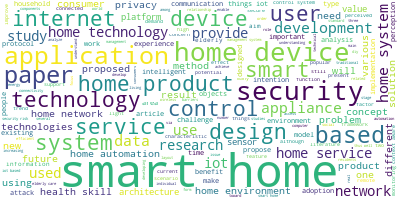

In [21]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_save['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Remove frequent words

In [22]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'volume', 'issue', 'english', 'elsevier', 'proquest'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# here we convert all cells from our dataframe into lists of words

data = df_save.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['recently', 'smart', 'home', 'products', 'shown', 'signs', 'rapid', 'development', 'increasing', 'awareness', 'smart', 'home', 'platforms', 'order', 'make', 'smart', 'home', 'enterprises', 'enter', 'era', 'smart', 'home', 'necessary', 'consider', 'elements', 'related', 'smart', 'home', 'platforms', 'study']


In [24]:
# check that we have the same number of articles
len(data_words)

67

In [25]:
df_w = pd.DataFrame({'col':data_words})
df_w['col'] = df_w['col'].apply(lambda x: ' '.join(x))

df_w.head()

,col
0,recently smart home products shown signs rapid...
1,paper survey smart home research definition cu...
2,smart home one emerging application domains in...
3,paper presents analytical review smart home ne...
4,aiming problems poor layout design efficiency ...


In [27]:
df_w.to_csv('clean.csv', index=False)

# Topic extraction: NMF model

## import the libraries

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [29]:
tfidf = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')

In [30]:
dtm  = tfidf.fit_transform(df_w["col"])

In [31]:
dtm

<67x665 sparse matrix of type '<class 'numpy.float64'>'
	with 2796 stored elements in Compressed Sparse Row format>

In [32]:
#n_components is the number of topics that we need to choose
nmf_model = NMF(n_components = 10, random_state = 42)

In [33]:
nmf_model.fit(dtm)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=10, random_state=42)

In [37]:
#check that the list of features is created correctly
tfidf.get_feature_names()[23]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'aged'

In [38]:
for index, topic in enumerate(nmf_model.components_):
    print(f"the top 15 words for topic # {index} ")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

the top 15 words for topic # 0 
['paper', 'devices', 'environment', 'automation', 'world', 'proposed', 'techniques', 'connected', 'appliances', 'enabled', 'services', 'based', 'things', 'internet', 'iot']


the top 15 words for topic # 1 
['studied', 'style', 'based', 'algorithm', 'study', 'consumers', 'value', 'method', 'intelligent', 'product', 'elderly', 'marketing', 'diy', 'design', 'products']


the top 15 words for topic # 2 
['issues', 'vendors', 'risk', 'solution', 'understand', 'secure', 'solutions', 'access', 'internet', 'device', 'concerns', 'protection', 'security', 'privacy', 'devices']


the top 15 words for topic # 3 
['study', 'new', 'perceptions', 'model', 'consumer', 'risk', 'imagined', 'objects', 'adopt', 'intention', 'adoption', 'perceived', 'intentions', 'consumers', 'technology']


the top 15 words for topic # 4 
['various', 'based', 'zigbee', 'technical', 'intelligent', 'networks', 'progress', 'application', 'solution', 'attacks', 'development', 'technology', 'ga

In [39]:
topic_results = nmf_model.transform(dtm)

In [40]:
topic_results[30].argmax()

5

In [41]:
#topic_results.argmax(axis = 1)

In [42]:
df_w['Topic'] = topic_results.argmax(axis=1)

In [45]:
# This is something you need to define yourself from the topocs abovi in the cell 48!

mytopic_dict = {0:'paper', 1:'algorithms', 2:'risks', 3:'new', 4:'various', 5:'sensors', 
                6:'cloud', 7:'communication', 8:'energy', 9:'methodology' }

In [46]:
df_w.head()

,col,Topic
0,recently smart home products shown signs rapid...,1
1,paper survey smart home research definition cu...,8
2,smart home one emerging application domains in...,5
3,paper presents analytical review smart home ne...,4
4,aiming problems poor layout design efficiency ...,1


In [47]:
df_w['Topic label'] = df_w['Topic'].map(mytopic_dict)

In [48]:
df_w.head()

,col,Topic,Topic label
0,recently smart home products shown signs rapid...,1,algorithms
1,paper survey smart home research definition cu...,8,energy
2,smart home one emerging application domains in...,5,sensors
3,paper presents analytical review smart home ne...,4,various
4,aiming problems poor layout design efficiency ...,1,algorithms


In [49]:
# end of the part